# Data Exploration 

## Problem Statement
Be able to generate new anime recommendations given a person's profile, which necessarily includes what anime they have watched and 
which ones they liked, which ones they didn't like. The profile will optionally contains additional information such as the person's age, gender, and location.<br>
## Data
In order to solve our objective, we are making use of a Kaggle dataset that essentially includes the three following things sourced from the website MyAnimeList (an online website community/database for people who watch anime):
- User List: a snapshot list of all the users in their database and some profile data, including but not limited to their birthdate, gender, location, number of anime watched, etc.
- Anime List: a snapshot list of all anime in their database when this dataset was curated
- Anime-lists List: a snapshot of the lists of anime each User has interacted with in some way (marked as to watch, watched in entirety or partly, etc.), their ratings, how many comments they left on them, etc.
There is a lot of data here to inspect.

First, we import the common libraries that we will use to do our EDA:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format='retina'

/tmp/ipykernel_341483/2384568806.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Users

In [2]:
df_users_cleaned = pd.read_csv("./data/users_cleaned.csv")
df_users_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108711 entries, 0 to 108710
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   username                  108710 non-null  object 
 1   user_id                   108711 non-null  int64  
 2   user_watching             108711 non-null  int64  
 3   user_completed            108711 non-null  int64  
 4   user_onhold               108711 non-null  int64  
 5   user_dropped              108711 non-null  int64  
 6   user_plantowatch          108711 non-null  int64  
 7   user_days_spent_watching  108711 non-null  float64
 8   gender                    108711 non-null  object 
 9   location                  108706 non-null  object 
 10  birth_date                108711 non-null  object 
 11  access_rank               0 non-null       float64
 12  join_date                 108711 non-null  object 
 13  last_online               108711 non-null  o

In [3]:
# drop access rank (all null)
df_users_cleaned.drop(columns=['access_rank'], inplace=True)
df_users_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108711 entries, 0 to 108710
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   username                  108710 non-null  object 
 1   user_id                   108711 non-null  int64  
 2   user_watching             108711 non-null  int64  
 3   user_completed            108711 non-null  int64  
 4   user_onhold               108711 non-null  int64  
 5   user_dropped              108711 non-null  int64  
 6   user_plantowatch          108711 non-null  int64  
 7   user_days_spent_watching  108711 non-null  float64
 8   gender                    108711 non-null  object 
 9   location                  108706 non-null  object 
 10  birth_date                108711 non-null  object 
 11  join_date                 108711 non-null  object 
 12  last_online               108711 non-null  object 
 13  stats_mean_score          108711 non-null  f

In [4]:
df_users_cleaned['gender'].value_counts()

gender
Male          70880
Female        37330
Non-Binary      501
Name: count, dtype: int64

In [5]:
df_users_cleaned['location'].value_counts()

location
Poland                      1656
Germany                     1132
Brazil                      1022
Canada                       900
California                   848
                            ... 
Melacca, Malaysia              1
not important                  1
Mexico city, Mexico            1
Vancouver, Washington486       1
nhollywood, california         1
Name: count, Length: 40438, dtype: int64

In [6]:
df_users_cleaned.iloc[0]

username                               karthiga
user_id                                 2255153
user_watching                                 3
user_completed                               49
user_onhold                                   1
user_dropped                                  0
user_plantowatch                              0
user_days_spent_watching              55.091667
gender                                   Female
location                        Chennai, India 
birth_date                  1990-04-29 00:00:00
join_date                   2013-03-03 00:00:00
last_online                 2014-02-04 01:32:00
stats_mean_score                           7.43
stats_rewatched                             0.0
stats_episodes                             3391
Name: 0, dtype: object

In [7]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

# create and test a function that computes the age in years given the date of birth string
datestr = df_users_cleaned['birth_date'][0].split(' ')[0] # remove the empty timestamp
def calcAgeFromDOB(datestr):
    dateobj = datetime.strptime(datestr, '%Y-%m-%d')
    diff = relativedelta(datetime.now(), dateobj)
    ageInYears = diff.years + (diff.months / 12) + (diff.days / 365)
    return round(ageInYears, 2)
calcAgeFromDOB(datestr)

33.99

In [8]:
# compute the users age from the birthdate

newAgeCol = []
def columnDOBToAgeInYears(row):
    datestr = row.split(' ')[0]
    newAgeCol.append(calcAgeFromDOB(datestr))

df_users_cleaned['birth_date'].apply(columnDOBToAgeInYears)

# add a new column 'age' [years]
df_users_cleaned['age'] = newAgeCol
# df_users_cleaned

In [9]:
df_users_cleaned['location'].value_counts()

location
Poland                      1656
Germany                     1132
Brazil                      1022
Canada                       900
California                   848
                            ... 
Melacca, Malaysia              1
not important                  1
Mexico city, Mexico            1
Vancouver, Washington486       1
nhollywood, california         1
Name: count, Length: 40438, dtype: int64

There are too many locations to do a nice visualization.

In [10]:
display(df_users_cleaned['age'].value_counts())
df_users_cleaned['gender'].value_counts()

age
30.67    153
28.92    141
31.17    139
30.42    137
30.17    137
        ... 
50.07      1
19.83      1
50.92      1
19.25      1
18.97      1
Name: count, Length: 3137, dtype: int64

gender
Male          70880
Female        37330
Non-Binary      501
Name: count, dtype: int64

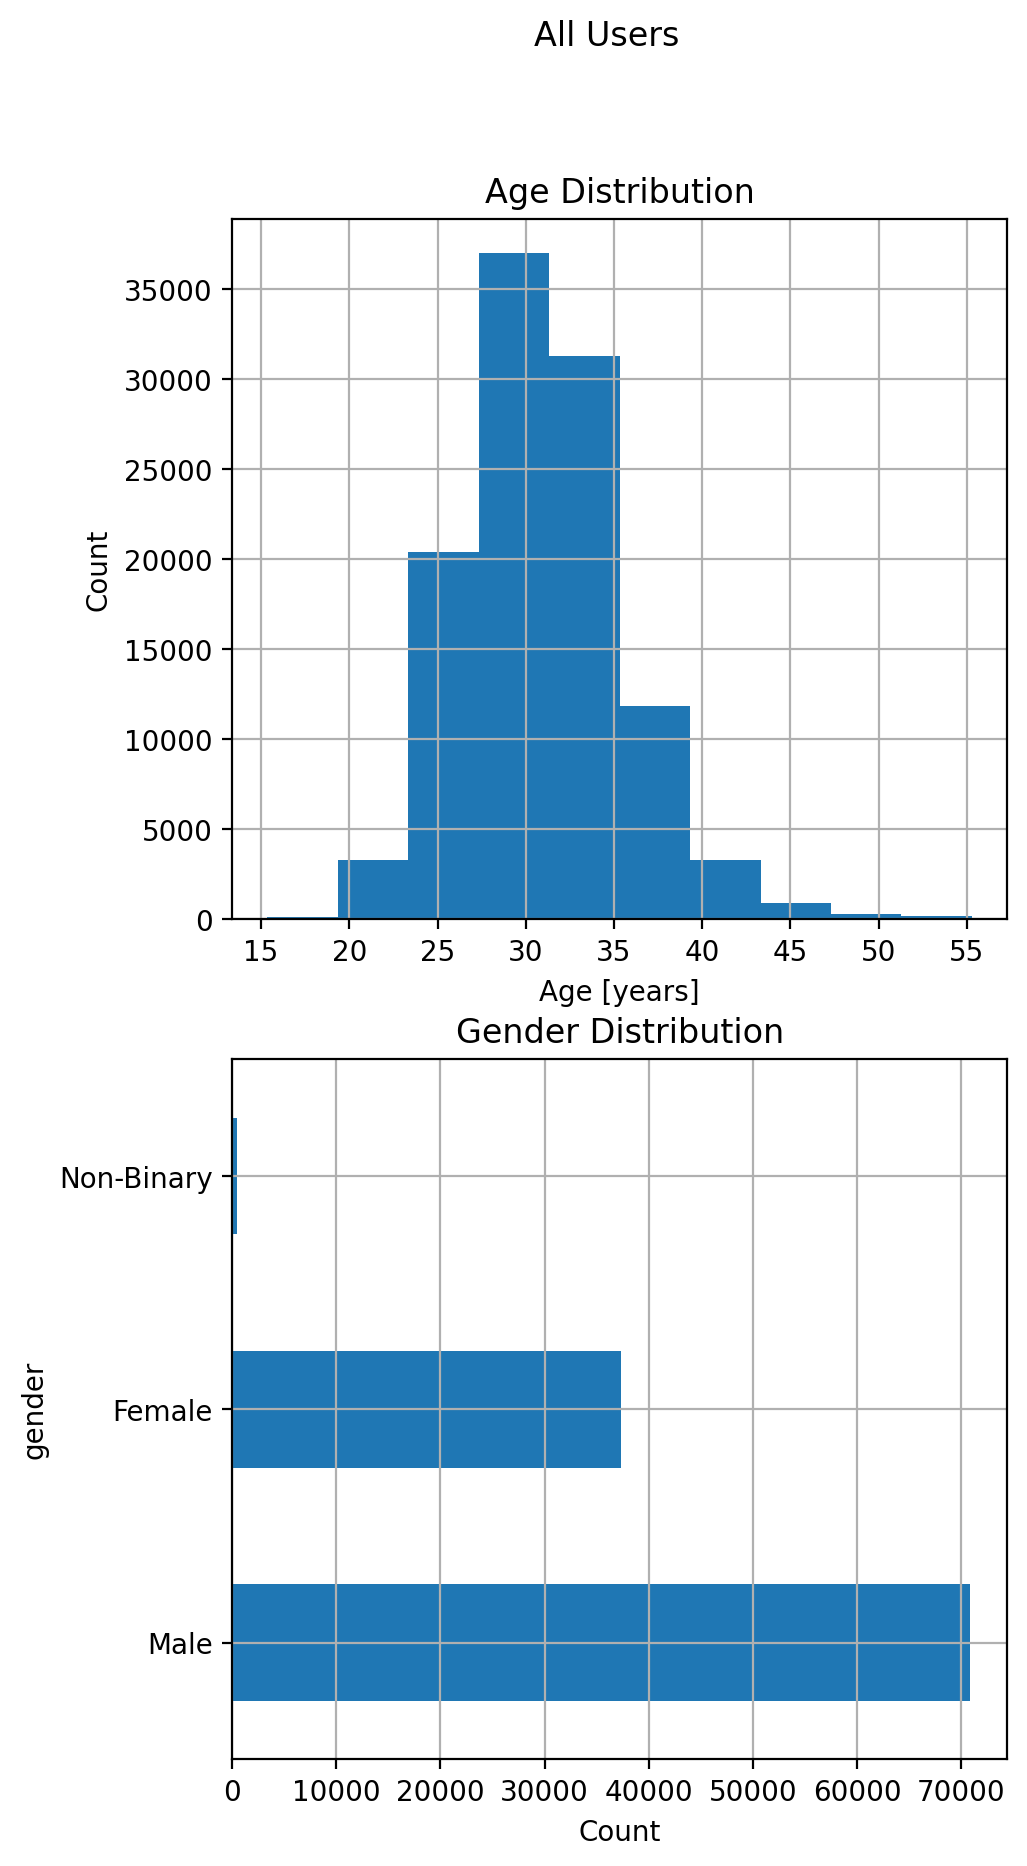

In [11]:
# look at the histograms of some of the users data

fig, ax = plt.subplots(2, 1, figsize=(5,10))
fig.suptitle('All Users')

# age
ax[0].hist(df_users_cleaned['age'])
ax[0].set_title('Age Distribution')
ax[0].set_xlabel('Age [years]')
ax[0].set_ylabel('Count')
ax[0].grid()

# gender
# ax[1].hist(df_users_cleaned['gender'].value_counts())
# sns.barplot(df_users_cleaned, x)
df_users_cleaned['gender'].value_counts().plot(kind='barh', ax=ax[1])
ax[1].set_title('Gender Distribution')
ax[1].set_xlabel('Count')
ax[1].grid()

Text(0.5, 0.98, 'Age Distribution by Gender')

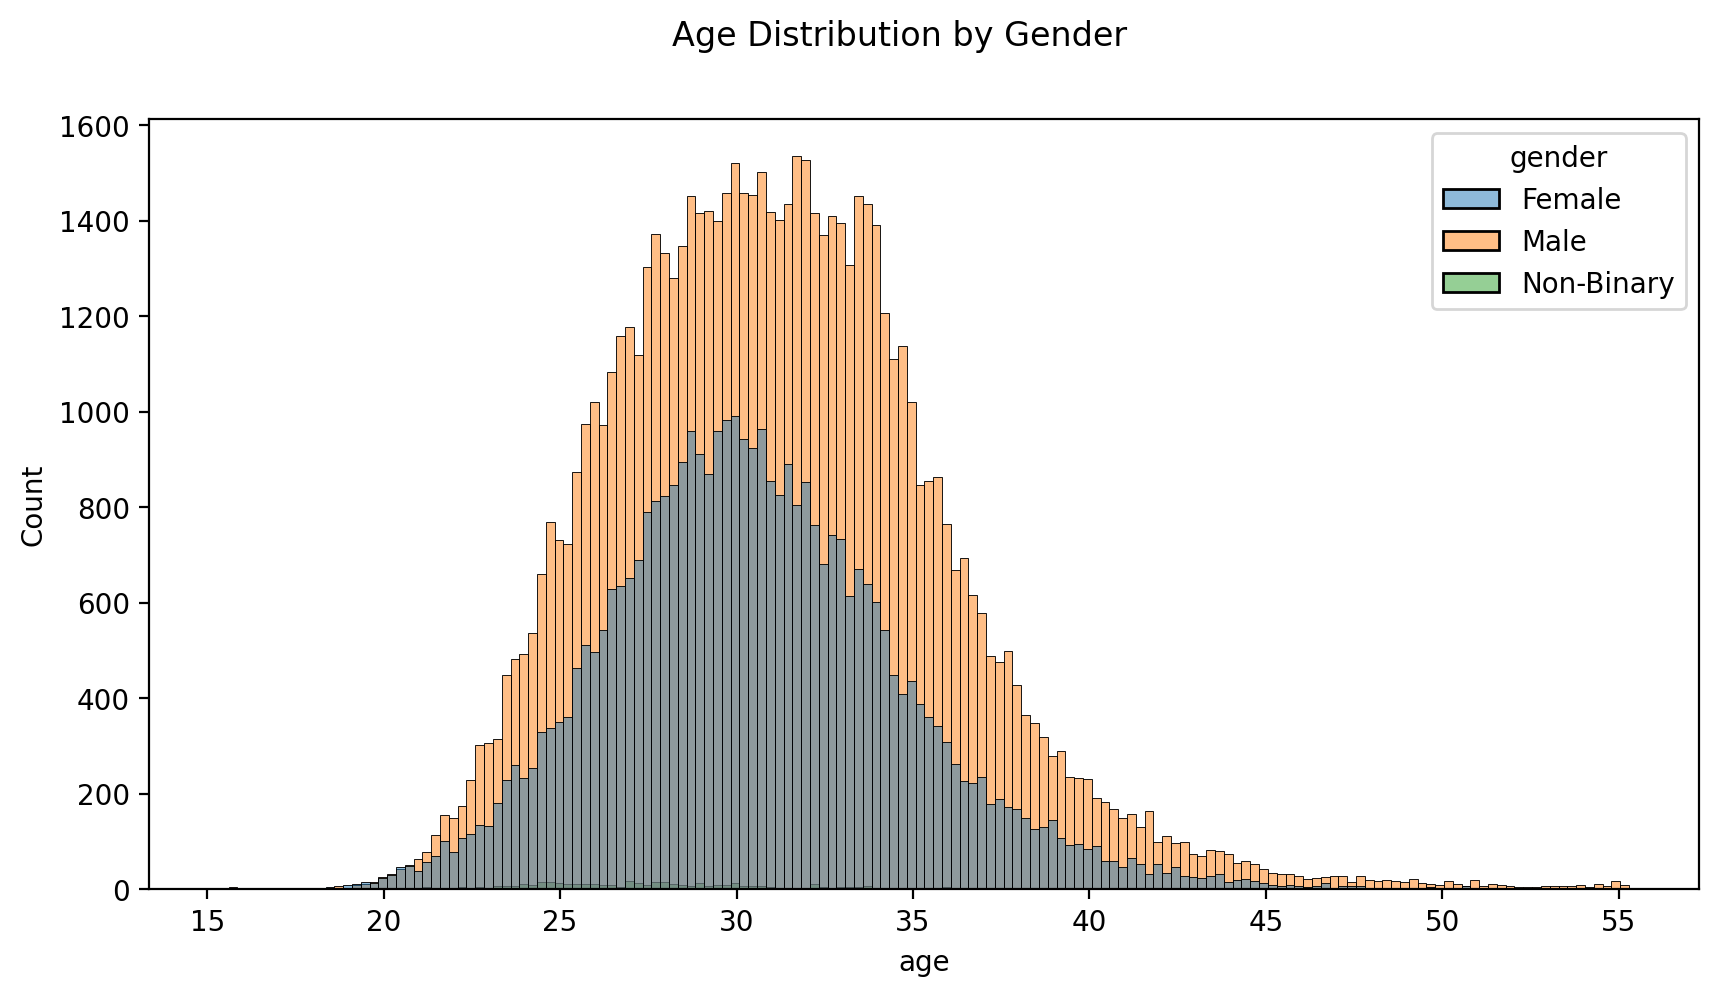

In [12]:
# let's see age of users separated by gender

# sns.barplot(df_users_cleaned, x='age', y='gender')

fig, ax = plt.subplots(1,1,figsize=(10,5))
sns.histplot(df_users_cleaned, x='age', hue='gender', ax=ax)
fig.suptitle('Age Distribution by Gender')

The non-binary age distribution is too small to see, so let's do a seaparate histogram plot for that:

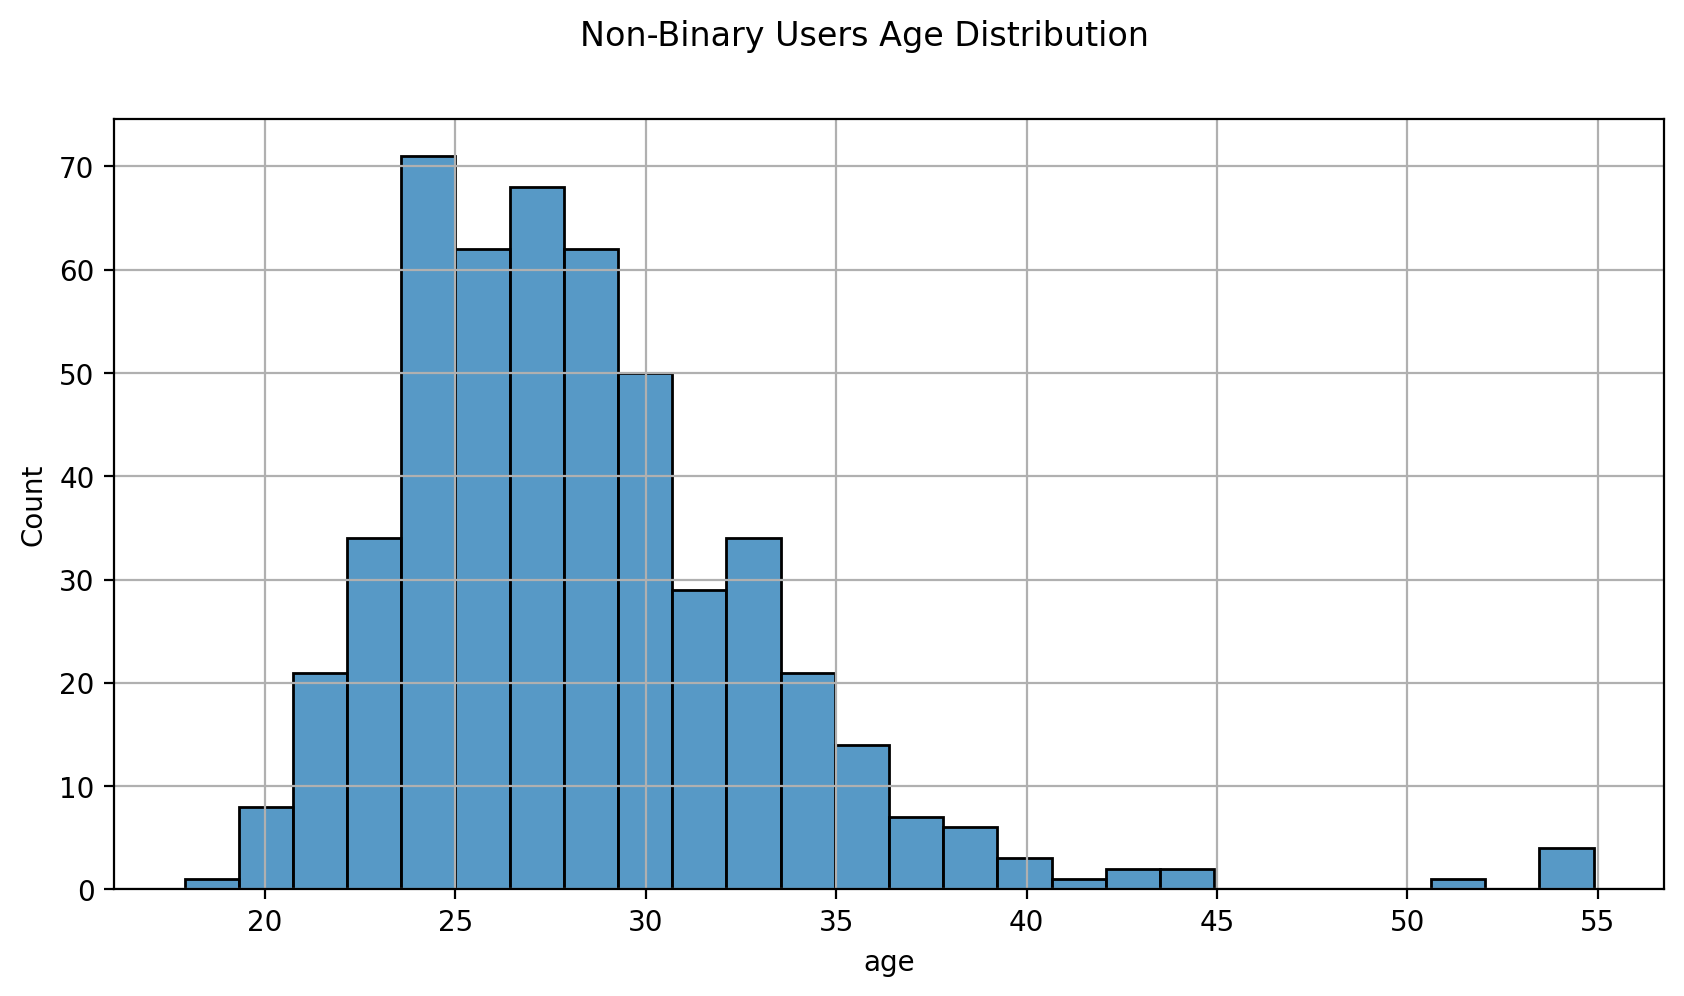

In [13]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
sns.histplot(df_users_cleaned[df_users_cleaned['gender'] == 'Non-Binary'], x='age')
fig.suptitle('Non-Binary Users Age Distribution')
ax.grid()

We can see that the Non-Binary identifying users skew a little younger, and we should be able to see this easier with boxplots:

<Axes: xlabel='age'>

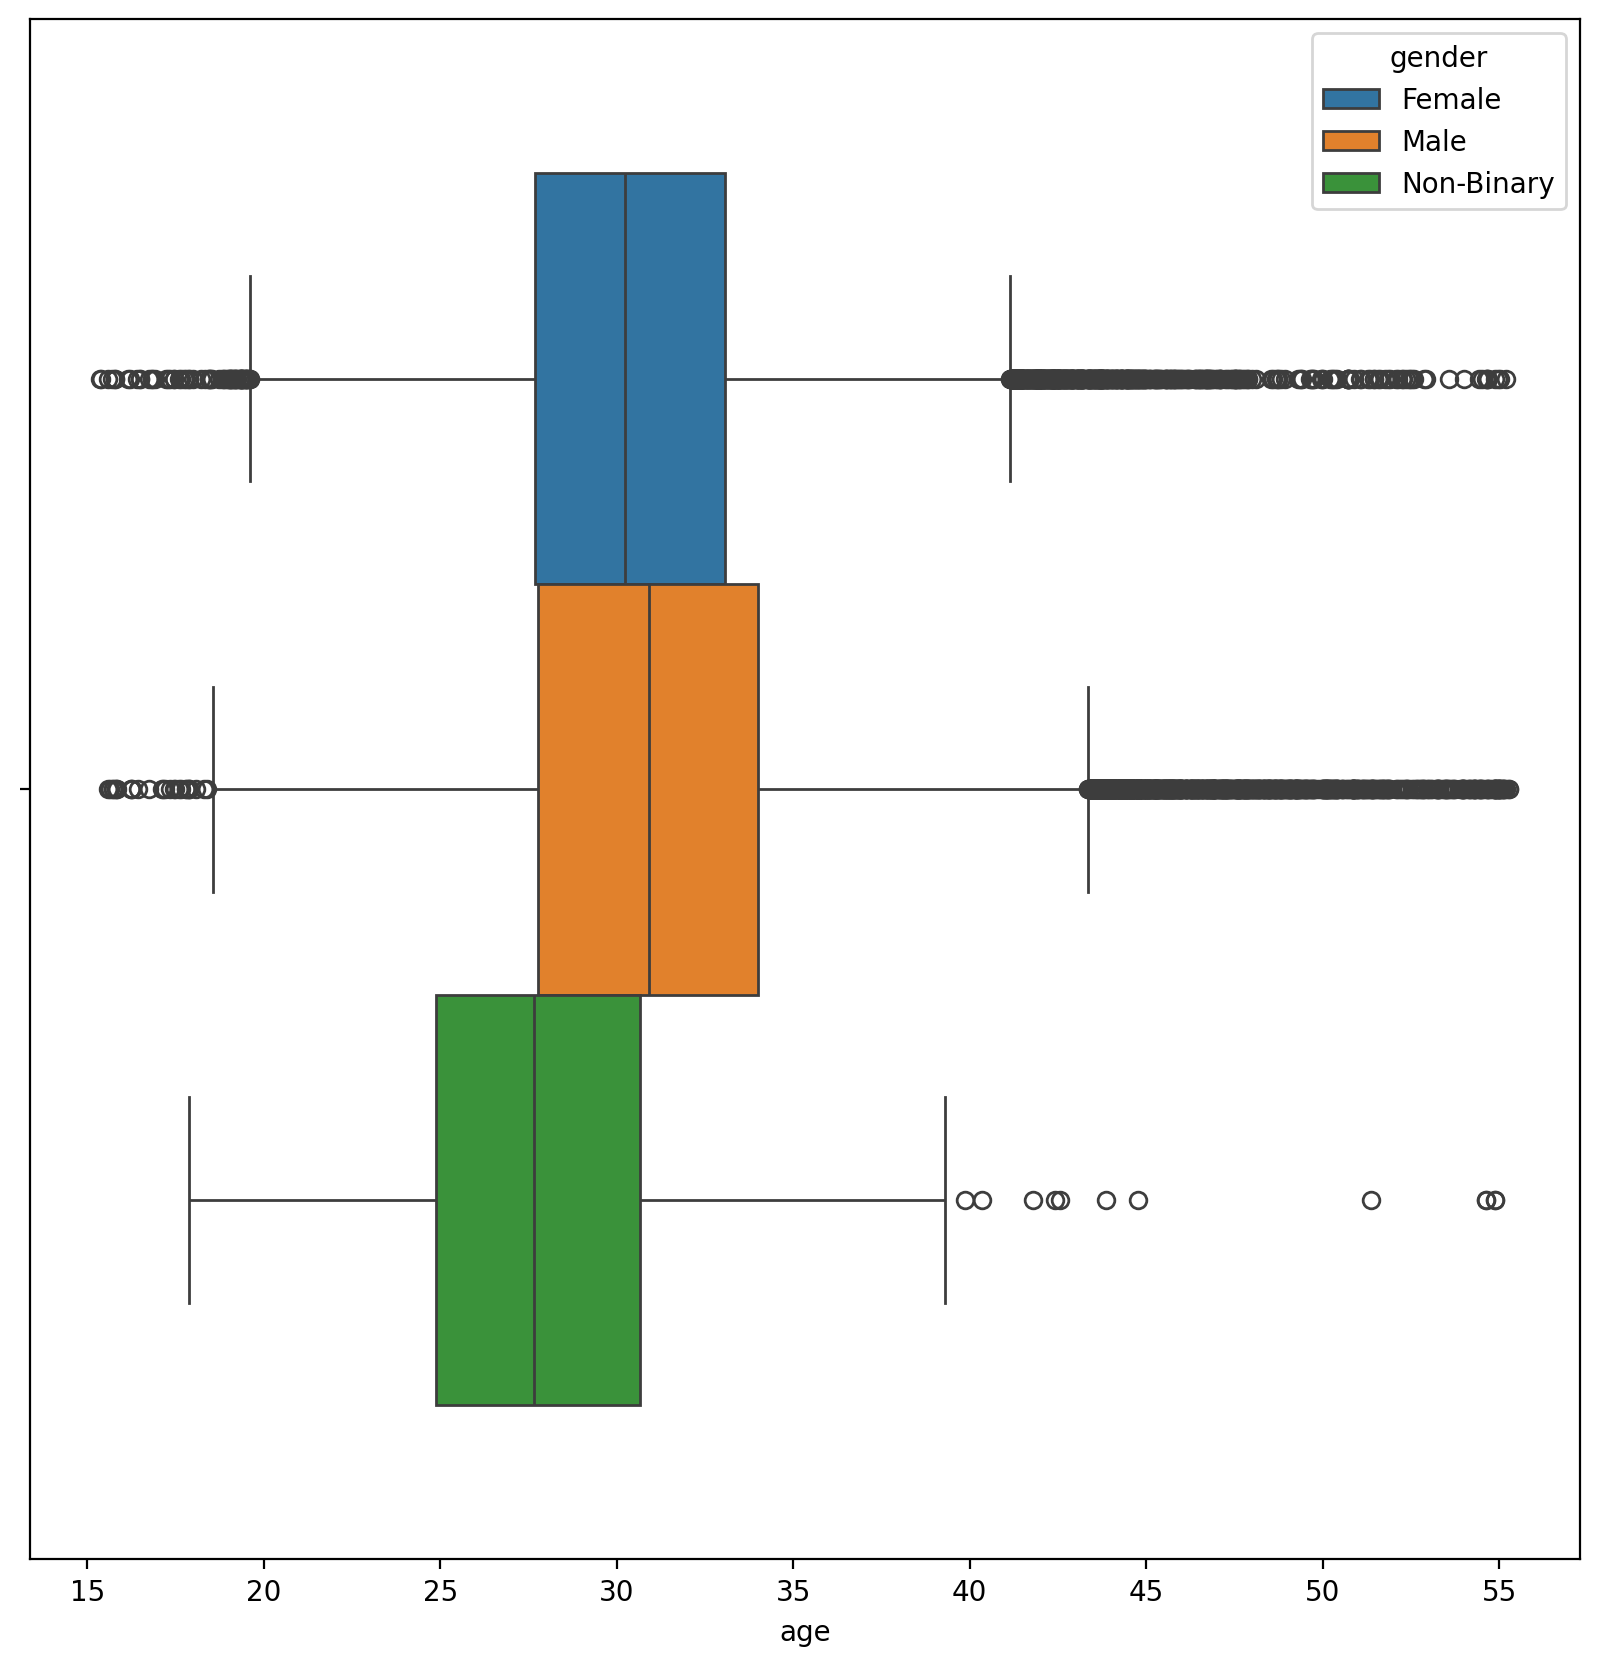

In [14]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
sns.boxplot(df_users_cleaned, x='age', hue='gender')

Ok, now let's dive into some data visualizations for the User's watching history.

In [15]:
df_users_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108711 entries, 0 to 108710
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   username                  108710 non-null  object 
 1   user_id                   108711 non-null  int64  
 2   user_watching             108711 non-null  int64  
 3   user_completed            108711 non-null  int64  
 4   user_onhold               108711 non-null  int64  
 5   user_dropped              108711 non-null  int64  
 6   user_plantowatch          108711 non-null  int64  
 7   user_days_spent_watching  108711 non-null  float64
 8   gender                    108711 non-null  object 
 9   location                  108706 non-null  object 
 10  birth_date                108711 non-null  object 
 11  join_date                 108711 non-null  object 
 12  last_online               108711 non-null  object 
 13  stats_mean_score          108711 non-null  f

Text(0.5, 1.0, 'Number of Anime Dropped')

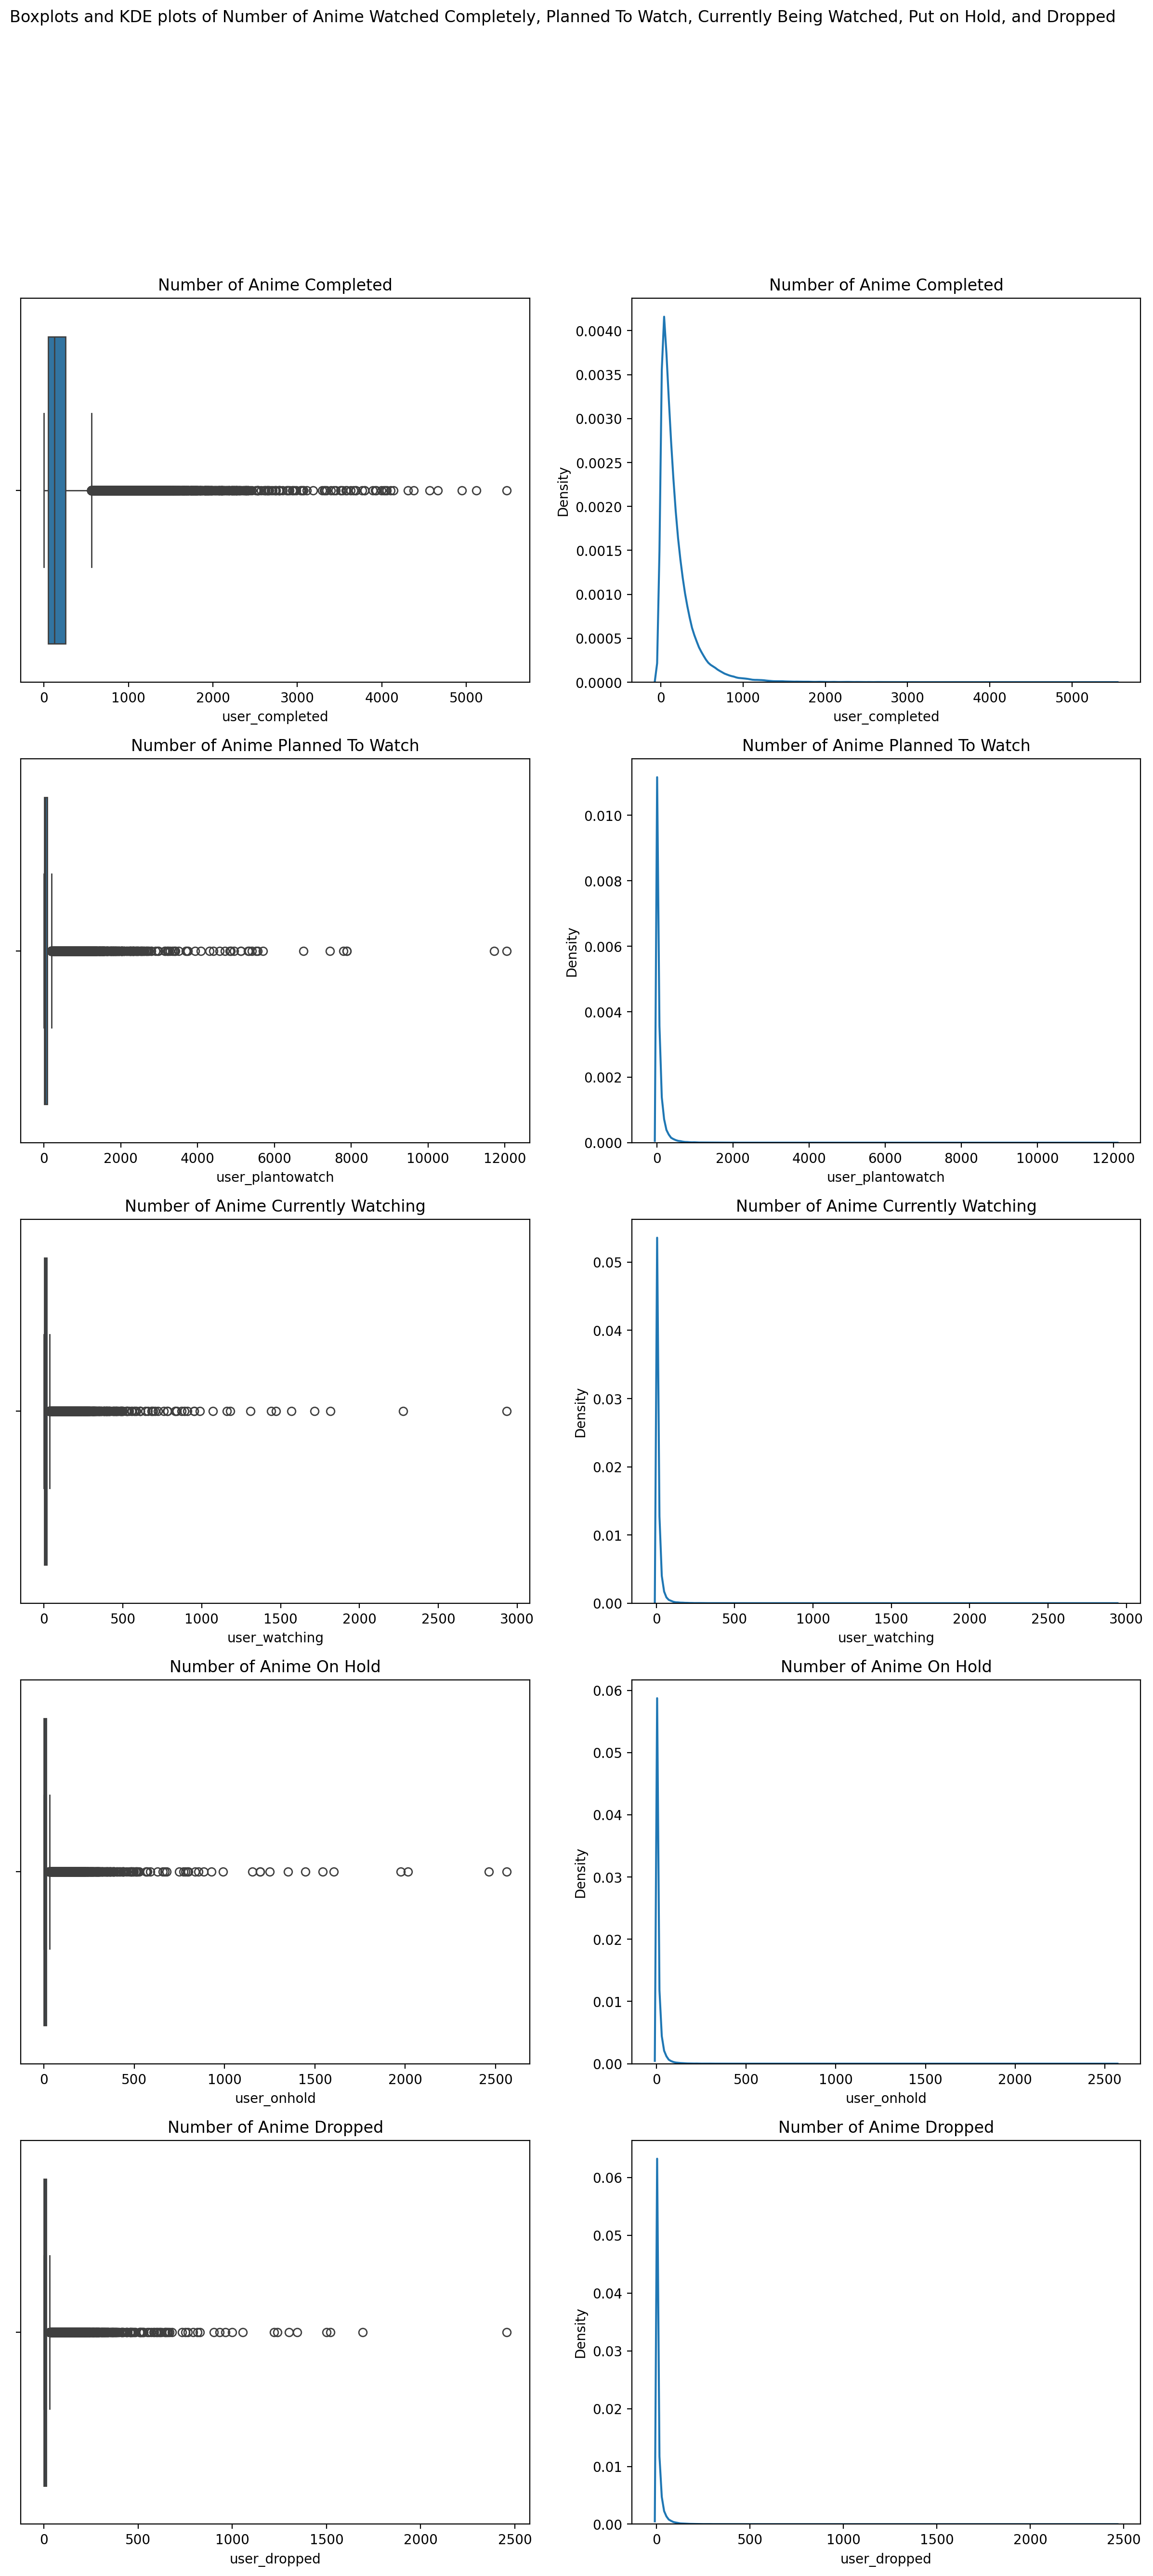

In [16]:
fig, ax = plt.subplots(5, 2, figsize=(15, 30))
fig.suptitle("Boxplots and KDE plots of Number of Anime Watched Completely, Planned To Watch, Currently Being Watched, Put on Hold, and Dropped")
sns.boxplot(df_users_cleaned, x='user_completed', ax=ax[0][0])
sns.kdeplot(df_users_cleaned, x='user_completed', ax=ax[0][1])
ax[0][0].set_title('Number of Anime Completed')
ax[0][1].set_title('Number of Anime Completed')

sns.boxplot(df_users_cleaned, x='user_plantowatch', ax=ax[1][0])
sns.kdeplot(df_users_cleaned, x='user_plantowatch', ax=ax[1][1])
ax[1][0].set_title('Number of Anime Planned To Watch')
ax[1][1].set_title('Number of Anime Planned To Watch')

sns.boxplot(df_users_cleaned, x='user_watching', ax=ax[2][0])
sns.kdeplot(df_users_cleaned, x='user_watching', ax=ax[2][1])
ax[2][0].set_title('Number of Anime Currently Watching')
ax[2][1].set_title('Number of Anime Currently Watching')

sns.boxplot(df_users_cleaned, x='user_onhold', ax=ax[3][0])
sns.kdeplot(df_users_cleaned, x='user_onhold', ax=ax[3][1])
ax[3][0].set_title('Number of Anime On Hold')
ax[3][1].set_title('Number of Anime On Hold')

sns.boxplot(df_users_cleaned, x='user_dropped', ax=ax[4][0])
sns.kdeplot(df_users_cleaned, x='user_dropped', ax=ax[4][1])
ax[4][0].set_title('Number of Anime Dropped')
ax[4][1].set_title('Number of Anime Dropped')

It looks like we have many outliers in our dataset. Let's look at the median number of each metric we observed above.

In [17]:
print(f"Median number of anime completed: {np.median(df_users_cleaned['user_completed'])}")
print(f"Median number of anime planned to watch: {np.median(df_users_cleaned['user_plantowatch'])}")
print(f"Median number of anime currently being watched: {np.median(df_users_cleaned['user_watching'])}")
print(f"Median number of anime on hold: {np.median(df_users_cleaned['user_onhold'])}")
print(f"Median number of anime dropped: {np.median(df_users_cleaned['user_dropped'])}")

Median number of anime completed: 123.0
Median number of anime planned to watch: 27.0
Median number of anime currently being watched: 7.0
Median number of anime on hold: 4.0
Median number of anime dropped: 3.0


### AnimeLists

In [18]:
# user data doesn't have the list of anime they watch, let's explore the other csvs
df_anime_lists_cleaned = pd.read_csv("./data/animelists_cleaned.csv")
df_anime_lists_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31284030 entries, 0 to 31284029
Data columns (total 11 columns):
 #   Column               Dtype  
---  ------               -----  
 0   username             object 
 1   anime_id             int64  
 2   my_watched_episodes  int64  
 3   my_start_date        object 
 4   my_finish_date       object 
 5   my_score             int64  
 6   my_status            int64  
 7   my_rewatching        float64
 8   my_rewatching_ep     int64  
 9   my_last_updated      object 
 10  my_tags              object 
dtypes: float64(1), int64(5), object(5)
memory usage: 2.6+ GB


Let's take a look at the raw data for an observation:

In [19]:
df_anime_lists_cleaned.iloc[0]
# we can see an anime_id and how many of this type of anime they watched...including what they rated it.
# this is good. now we just need to find the mapping from the anime_id to the anime name in english or japanese.

username                          karthiga
anime_id                                21
my_watched_episodes                    586
my_start_date                   0000-00-00
my_finish_date                  0000-00-00
my_score                                 9
my_status                                1
my_rewatching                          NaN
my_rewatching_ep                         0
my_last_updated        2013-03-03 10:52:53
my_tags                                NaN
Name: 0, dtype: object

In [20]:
len(df_anime_lists_cleaned[df_anime_lists_cleaned['username'] == 'karthiga'])

53

In [21]:
df_anime_lists_cleaned['my_rewatching'].value_counts()

my_rewatching
0.0    24386495
1.0       19288
Name: count, dtype: int64

In [22]:
# explore tags given to anime by users
df_anime_lists_cleaned['my_tags'].value_counts()

my_tags
undefined                     13356
Hentai                         6760
Sub                            6333
Comedy                         5744
comedy                         5613
                              ...  
I want them as pets.              1
Was actually not that bad,        1
Great start turns out meh.        1
doggy style days                  1
basta                             1
Name: count, Length: 997553, dtype: int64

The tags look very varied, as they accepted as manual input by the user it seems. We would need to do more preprocessing on the tags values if we wanted to use them later on, as we can see that there are duplicates (e.g. `Comedy` and `comedy` for example). 

Let's look at the distribution of anime ids, to know which animes are popular and which ones are not.

In [23]:
df_anime_lists_cleaned['anime_id'].value_counts()

anime_id
1535     81332
1575     67721
226      64486
5114     63649
4224     63278
         ...  
37896        2
37620        2
37493        1
37494        1
36818        1
Name: count, Length: 6668, dtype: int64

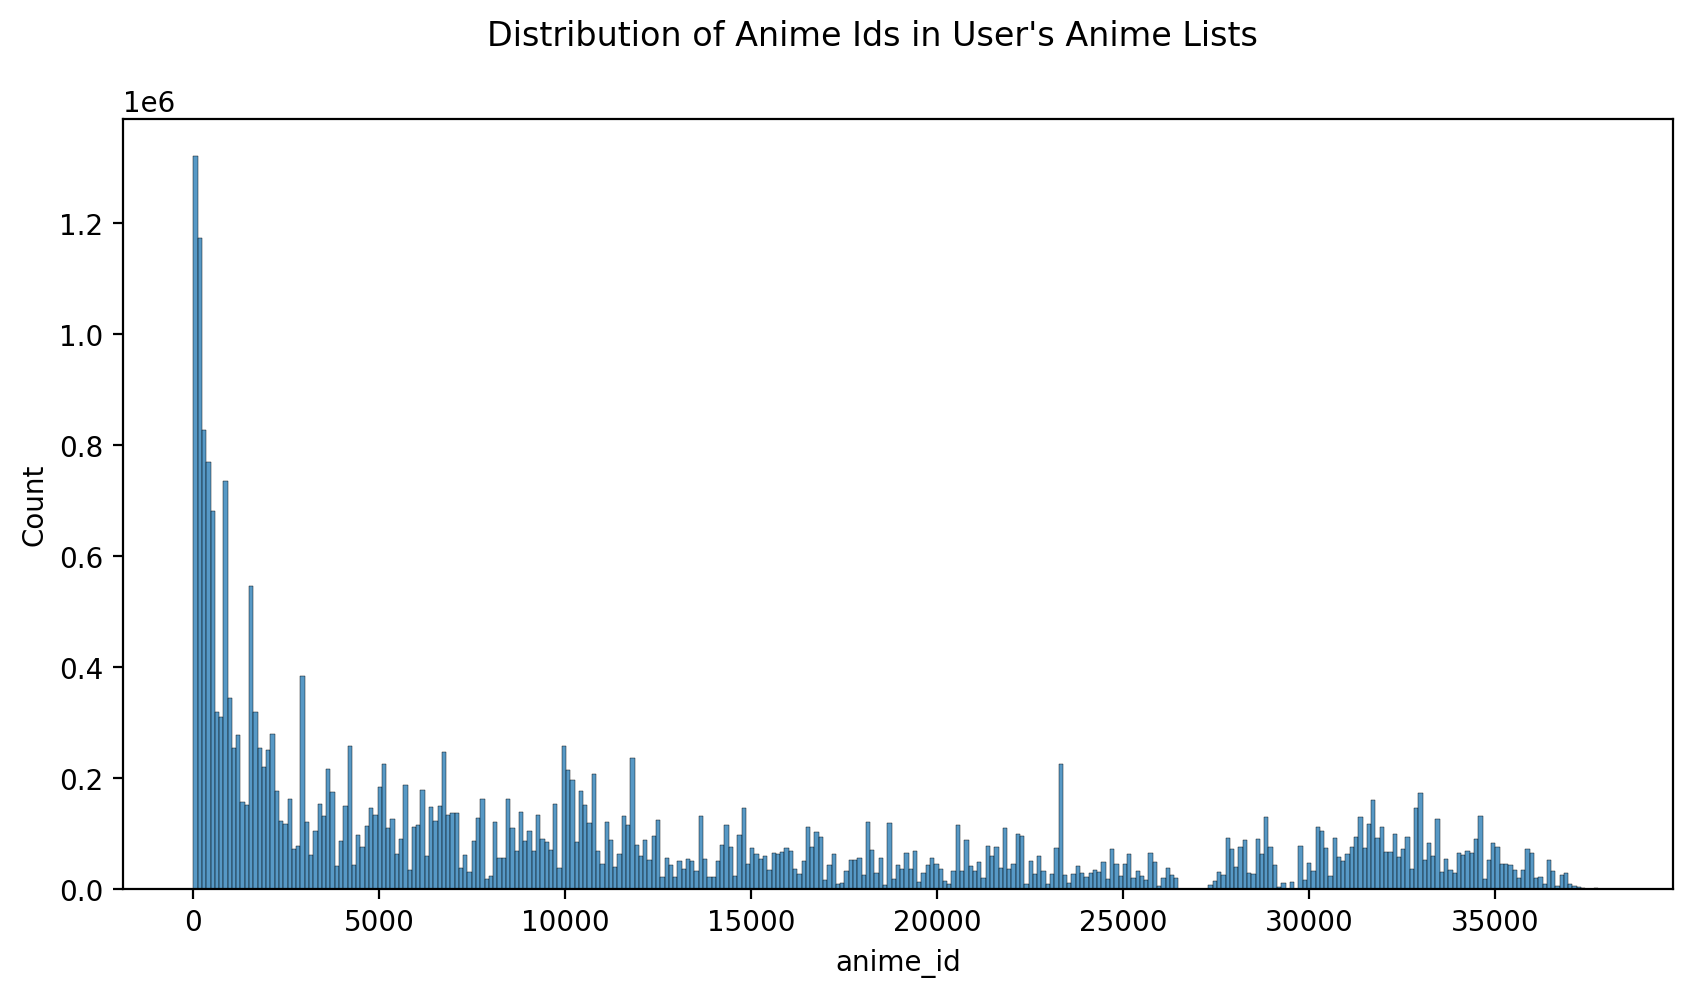

In [24]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
sns.histplot(df_anime_lists_cleaned, x='anime_id', ax=ax)
fig.suptitle("Distribution of Anime Ids in User's Anime Lists");

In [25]:
# save some popular (defined by how often the aniem id appeared in users anime lists) anime ids in to examine later.
popular_anime_ids = df_anime_lists_cleaned['anime_id'].value_counts().index[:100]
popular_anime_ids

Index([ 1535,  1575,   226,  5114,  4224,    20, 11757, 16498,  6547,   269,
        2167,   121,   849,  9253,  3588,  6746,  2001,  2904,   199,  5081,
       10620,  8074,  1735,  6702,  9919,    30, 11111,  2025,     1,  5680,
        4181,   853,   934,  9989,   356,  9756, 19815,    21, 22319, 13601,
        1689,  4898, 30276, 20507,  6880, 10793,   205,  1887,  2251,   431,
        7054,  1195, 10087, 18679,   355,   164,  2966,  2236, 15809,   918,
       12189,  1482, 14741,   889,  1210,  1818,  8769, 21881,  4654,  6045,
         227,   813,   270,  2476,  5630,  2993,  3457, 22199,    59, 23273,
       31043, 13759,    71, 14227, 14813,   457, 22535, 18153,  6347, 10719,
        8525, 28223, 11617, 32281,   245,   790, 17265,  4382,   223,     6],
      dtype='int64', name='anime_id')

Text(0.5, 0.98, 'Distribution of Anime Rating Scores')

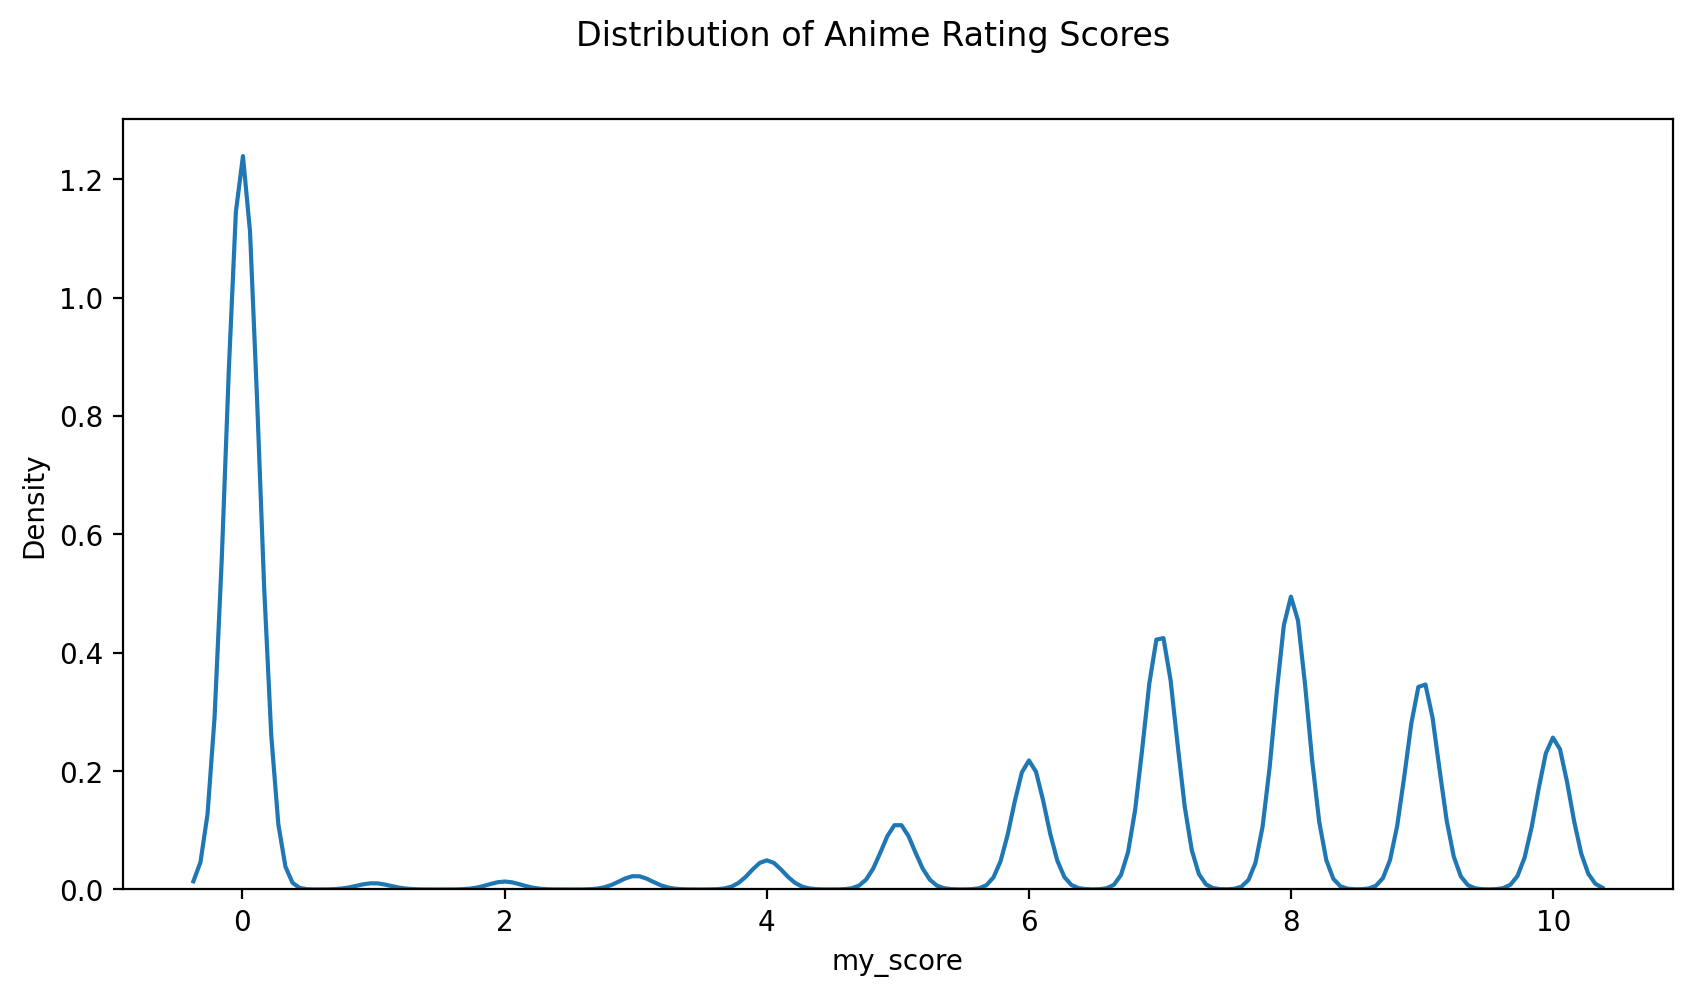

In [26]:
# distribution of scores 
fig, ax = plt.subplots(1,1,figsize=(10,5))
sns.kdeplot(df_anime_lists_cleaned, x='my_score', ax=ax)
fig.suptitle("Distribution of Anime Rating Scores")

In [27]:
# tags
df_anime_lists_cleaned['my_tags'].value_counts()

my_tags
undefined                     13356
Hentai                         6760
Sub                            6333
Comedy                         5744
comedy                         5613
                              ...  
I want them as pets.              1
Was actually not that bad,        1
Great start turns out meh.        1
doggy style days                  1
basta                             1
Name: count, Length: 997553, dtype: int64

### Anime

In [28]:
df_anime_cleaned = pd.read_csv("./data/anime_cleaned.csv")
df_anime_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6668 entries, 0 to 6667
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   anime_id         6668 non-null   int64  
 1   title            6668 non-null   object 
 2   title_english    3438 non-null   object 
 3   title_japanese   6663 non-null   object 
 4   title_synonyms   4481 non-null   object 
 5   image_url        6666 non-null   object 
 6   type             6668 non-null   object 
 7   source           6668 non-null   object 
 8   episodes         6668 non-null   int64  
 9   status           6668 non-null   object 
 10  airing           6668 non-null   bool   
 11  aired_string     6668 non-null   object 
 12  aired            6668 non-null   object 
 13  duration         6668 non-null   object 
 14  rating           6586 non-null   object 
 15  score            6668 non-null   float64
 16  scored_by        6668 non-null   int64  
 17  rank          

In [29]:
str(df_anime_cleaned[df_anime_cleaned['anime_id'] == 21])
df_anime_cleaned[df_anime_cleaned['anime_id'] == 21]['image_url'].values

array(['https://myanimelist.cdn-dena.com/images/anime/6/73245.jpg'],
      dtype=object)

In [30]:
popular_anime_ids.values

array([ 1535,  1575,   226,  5114,  4224,    20, 11757, 16498,  6547,
         269,  2167,   121,   849,  9253,  3588,  6746,  2001,  2904,
         199,  5081, 10620,  8074,  1735,  6702,  9919,    30, 11111,
        2025,     1,  5680,  4181,   853,   934,  9989,   356,  9756,
       19815,    21, 22319, 13601,  1689,  4898, 30276, 20507,  6880,
       10793,   205,  1887,  2251,   431,  7054,  1195, 10087, 18679,
         355,   164,  2966,  2236, 15809,   918, 12189,  1482, 14741,
         889,  1210,  1818,  8769, 21881,  4654,  6045,   227,   813,
         270,  2476,  5630,  2993,  3457, 22199,    59, 23273, 31043,
       13759,    71, 14227, 14813,   457, 22535, 18153,  6347, 10719,
        8525, 28223, 11617, 32281,   245,   790, 17265,  4382,   223,
           6])

In [31]:
# examine the popular anime that we saw from earlier

popularAnimeDf = pd.DataFrame()
for id in popular_anime_ids:
    popularAnimeDf = pd.concat([popularAnimeDf, df_anime_cleaned[df_anime_cleaned['anime_id'] == id]])
popularAnimeDf

anime_id                              title  \
3802      1535                         Death Note   
6579      1575    Code Geass: Hangyaku no Lelouch   
4171       226                         Elfen Lied   
1261      5114   Fullmetal Alchemist: Brotherhood   
19        4224                          Toradora!   
...        ...                                ...   
202        790                         Ergo Proxy   
1900     17265                        Log Horizon   
5721      4382  Suzumiya Haruhi no Yuuutsu (2009)   
1915       223                        Dragon Ball   
2603         6                             Trigun   

                                   title_english              title_japanese  \
3802                                  Death Note                       デスノート   
6579        Code Geass: Lelouch of the Rebellion             コードギアス 反逆のルルーシュ   
4171                                  Elfen Lied                    エルフェンリート   
1261            Fullmetal Alchemist: Brotherhood  鋼の錬金術師 FULLMETAL ALCHEMIST   
19                                     Toradora!                       とらドラ！   
...                                          ...                         ...   
202                                   Ergo Proxy                    エルゴプラクシー   
1900                                 Log Horizon                    ログ・ホライズン   
5721  The Melancholy of Haruhi Suzumiya Season 2                    涼宮ハルヒの憂鬱   
1915                                 Dragon Ball                     ドラゴンボール   
2603                                      Trigun                       トライガン   

                                         title_synonyms  \
3802                                                 DN   
6579                                                NaN   
4171                             Elfen Song, Elfic Song   
1261  Hagane no Renkinjutsushi: Fullmetal Alchemist,...   
19                                       Tiger X Dragon   
...                                                 ...   
202                                                 NaN   
1900                                                NaN   
5721  Suzumiya Haruhi no Yuutsu (2009), Endless Eigh...   
1915                                     Dragonball, DB   
2603                                                NaN   

                                              image_url type       source  \
3802  https://myanimelist.cdn-dena.com/images/anime/...   TV        Manga   
6579  https://myanimelist.cdn-dena.com/images/anime/...   TV     Original   
4171  https://myanimelist.cdn-dena.com/images/anime/...   TV        Manga   
1261  https://myanimelist.cdn-dena.com/images/anime/...   TV        Manga   
19    https://myanimelist.cdn-dena.com/images/anime/...   TV  Light novel   
...                                                 ...  ...          ...   
202   https://myanimelist.cdn-dena.com/images/anime/...   TV     Original   
1900  https://myanimelist.cdn-dena.com/images/anime/...   TV        Novel   
5721  https://myanimelist.cdn-dena.com/images/anime/...   TV  Light novel   
1915  https://myanimelist.cdn-dena.com/images/anime/...   TV        Manga   
2603  https://myanimelist.cdn-dena.com/images/anime/...   TV        Manga   

      episodes           status  ...                  broadcast  \
3802        37  Finished Airing  ...  Wednesdays at 00:56 (JST)   
6579        25  Finished Airing  ...     Fridays at 01:25 (JST)   
4171        13  Finished Airing  ...     Sundays at 22:30 (JST)   
1261        64  Finished Airing  ...     Sundays at 17:00 (JST)   
19          25  Finished Airing  ...   Thursdays at 01:20 (JST)   
...        ...              ...  ...                        ...   
202         23  Finished Airing  ...   Saturdays at 19:00 (JST)   
1900        25  Finished Airing  ...   Saturdays at 17:30 (JST)   
5721        14  Finished Airing  ...     Fridays at 00:40 (JST)   
1915       153  Finished Airing  ...  Wednesdays at 19:00 (JST)   
2603        26  Finished Airing  ... 

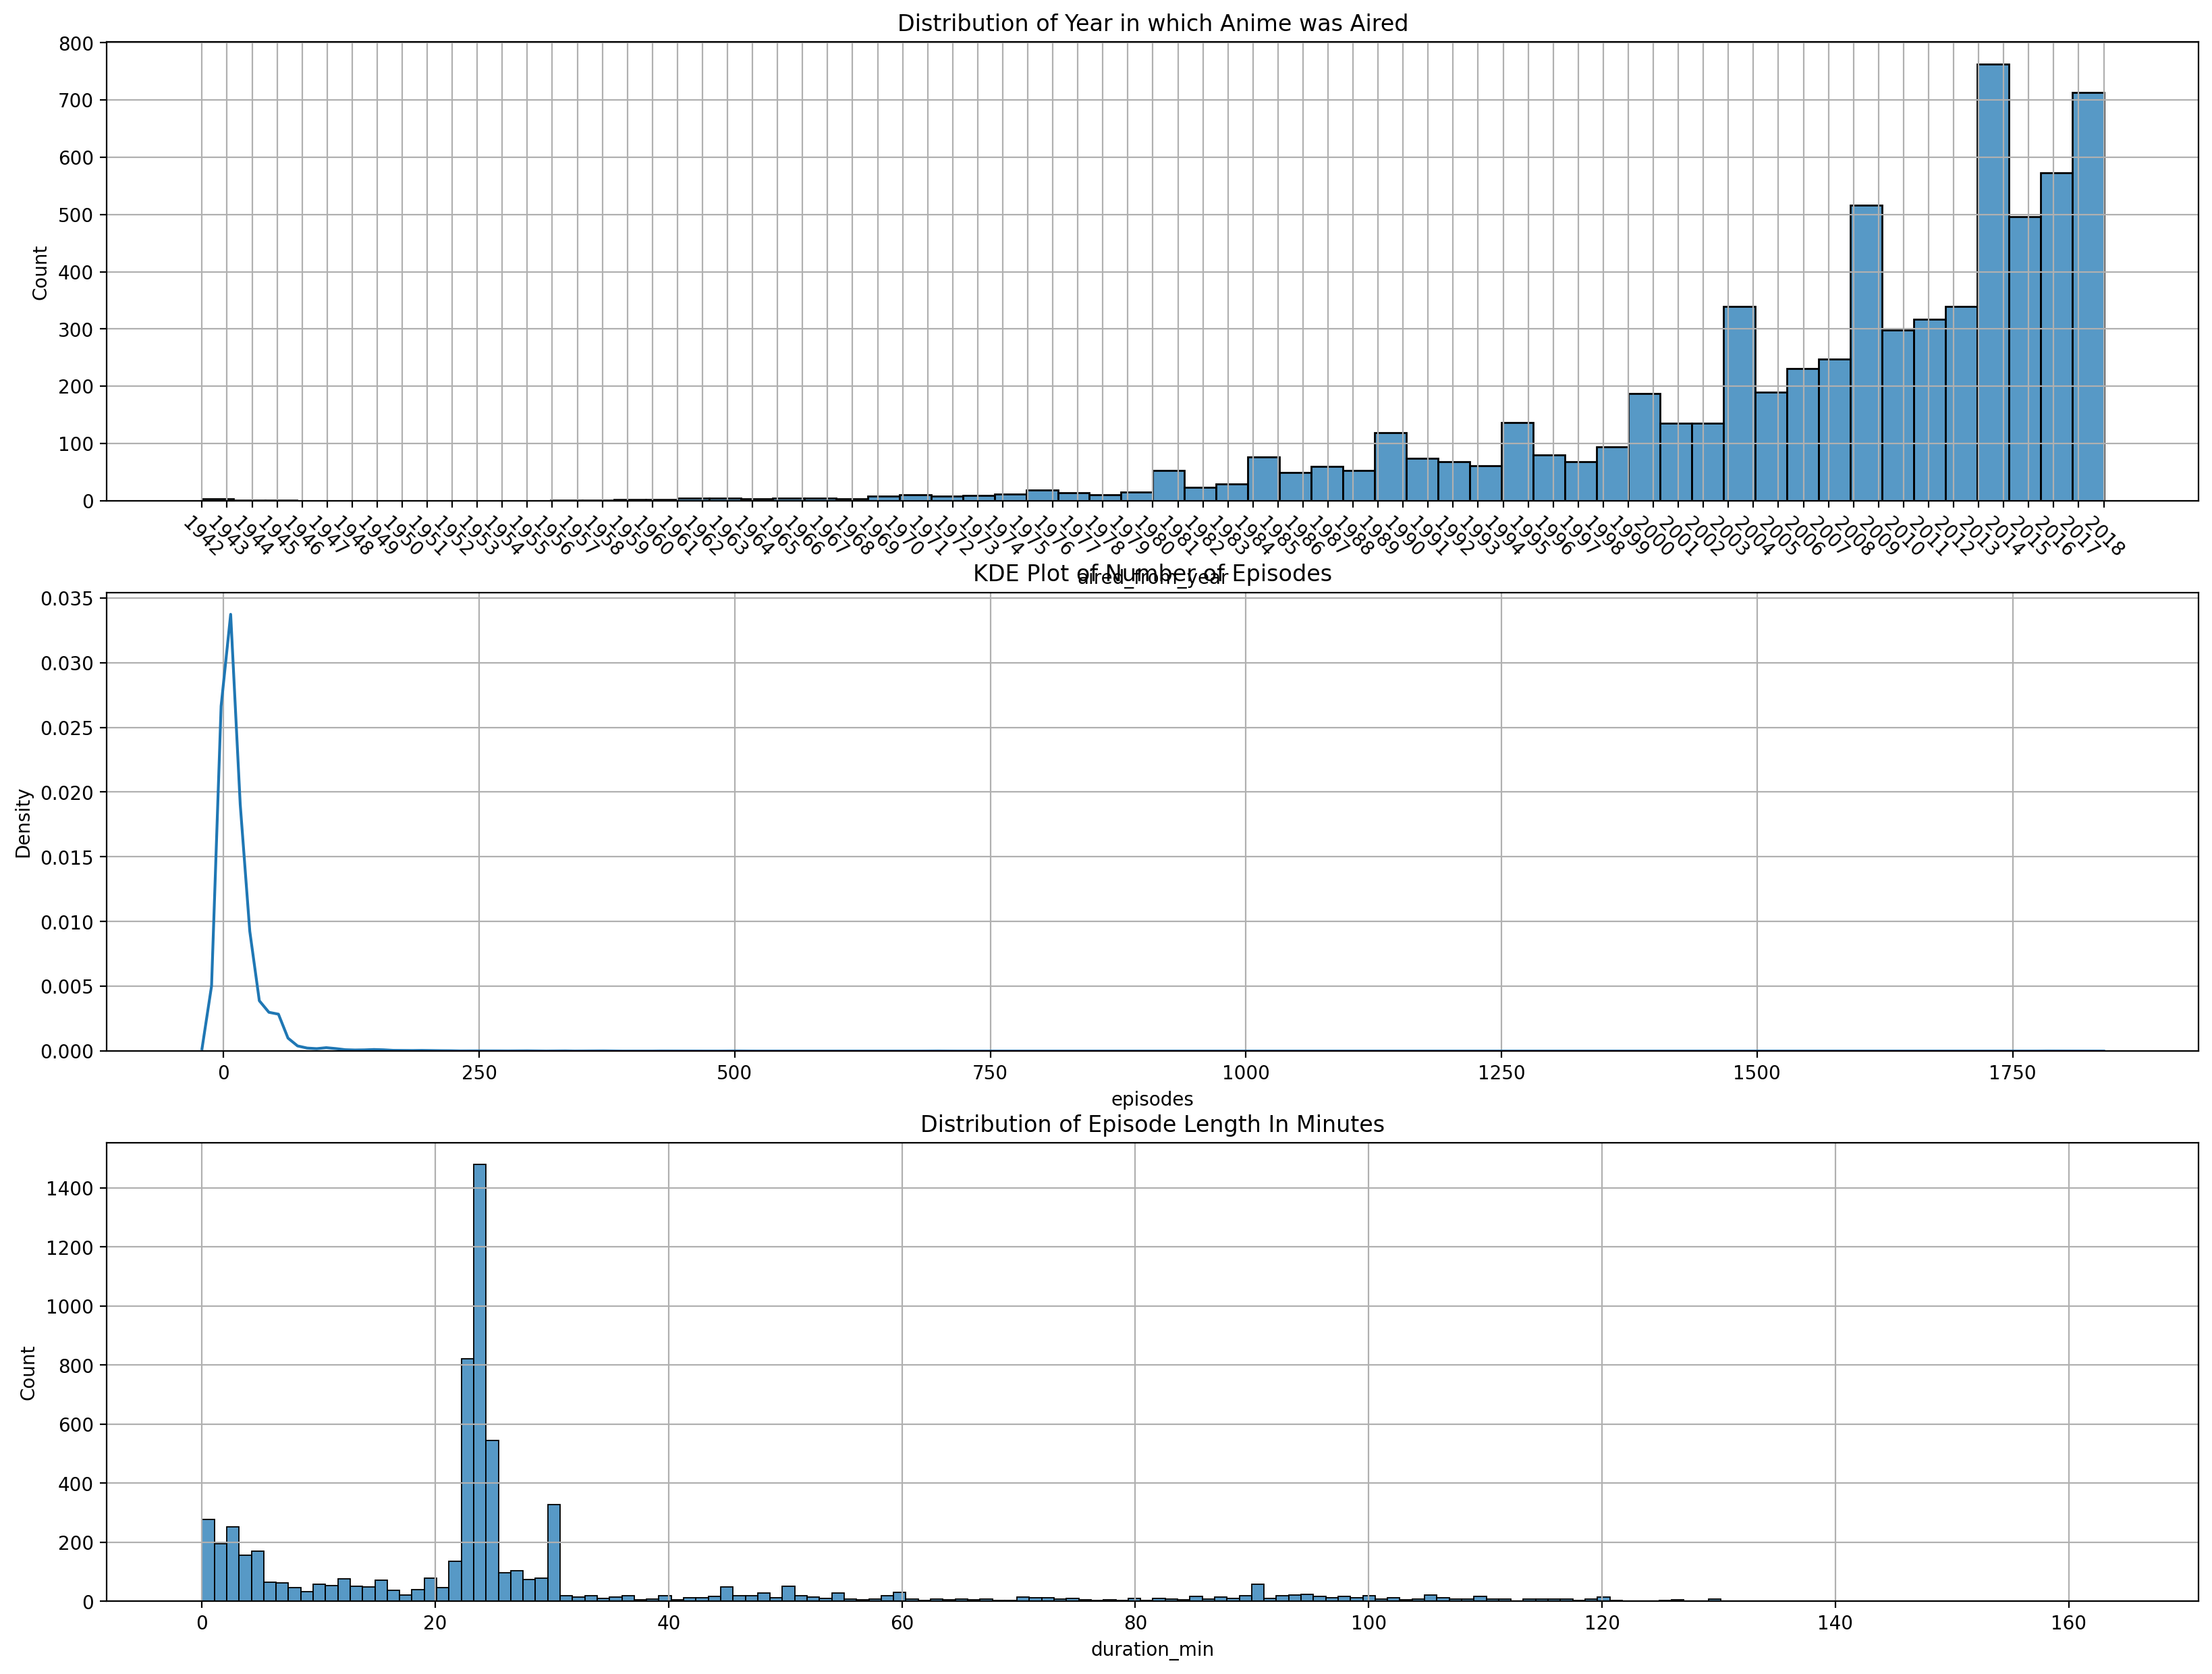

In [32]:
fig, ax = plt.subplots(3,1,figsize=(20,15))

# initial airing year distribution
sns.histplot(df_anime_cleaned, x='aired_from_year', ax=ax[0])
minYear = df_anime_cleaned['aired_from_year'].min()
maxYear = df_anime_cleaned['aired_from_year'].max()
diff =  maxYear - minYear
aired_years = [y for y in range(int(minYear), int(minYear + diff+1))]
# ax[0].set_xticks([i for i in range(len(aired_years))])
ax[0].set_xticks(aired_years)
ax[0].set_xticklabels(aired_years, rotation=-45)
ax[0].set_title("Distribution of Year in which Anime was Aired")
ax[0].grid()

sns.kdeplot(df_anime_cleaned, x='episodes', ax=ax[1])
ax[1].set_title("KDE Plot of Number of Episodes")
ax[1].grid()

sns.histplot(df_anime_cleaned, x='duration_min', ax=ax[2])
ax[2].set_title("Distribution of Episode Length In Minutes")
ax[2].grid()

In [33]:
fig, ax = plt.subplots(1,1,figsize=(20, 100))
df_anime_cleaned['studio'].value_counts().plot(kind='barh', ax=ax)
ax.set_title("Number of Anime Produced by Each Studio")
ax.grid()
ax.set_xlabel("Count");

## Summary and Conclusions on Initial Data Exploration
First, let's talk about the users. There are a lot of outlier users in the dataset. Most users in the dataset are what we would call casual watchers/fans, and mixed into the data we can find many more hardcore fans, who consume a lot more anime than the average casual enjoyer. For each user, we have information not only about their physical identity (e.g. date of birth, sex, location) we also know which anime they have watched, will watch, or interacted with in some way on the MyAnimeList site. 

For the anime, we have a lot of data specific to each anime (e.g. genres, number of episodes, episode duration, studio, aired year, etc.). For each user and an anime that they've interacted with, we have data on how many episodes of that anime they have watched, what scores they gave to them (on a scale of 0 to 10, where 0 is also no rating), and what tags they marked them as.

## Expected Modeling Techniques To Use
Our goal is to be able to predict new anime watch recommendations, given a users list of anime. The most straightforward approach will be to do association rule mining, creating frequent itemsets of anime. 
Let's say we want to give recommendations to a user called Alice who has watched anime `{x, y, z}`. 
We will find our frequent itemsets from the MyAnimeList data, filter out our best, strongest rules, and then see which of our strongest rules contain any or all anime from Alice's list of `{x, y, z}` in their antecedents and take the consequents as the anime predicted/recommended. 

We will start with the association rule mining approach and see how well that performs. Since we also have data on the user's themselves (e.g. age and gender), I think those two pieces of information could be useable as well, if at recommendation time we get age and sex input data; however, we would need to consider a different approach in order to make that work.